<a href="https://colab.research.google.com/github/dineshkumarsarangapani/Machine_learning_IITM/blob/main/solutions/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

## Dataset



In [2]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, flip_y = 0, class_sep = 3, random_state=20)

## 1
How many samples are there in the dataset?


In [5]:
X.shape[0]

50

There are 50 samples.

## 2

How many features are there in the dataset?


In [4]:
X.shape[1]

2

There are 2 features.

## 3
In the target vector $y$, replace all occurrences of 0 with -1. 



In [8]:
y[y==0] = -1
y

array([ 1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,
        1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1])

## 4

How many unique classes are there in the target vector?


In [10]:
np.unique(y)

array([-1,  1])

## 5
Plot the data keeping first feature on the x-axis and the second feature on the y-axis. Plot the data points belonging to each class in different colors. Does the data seem linearly separable?

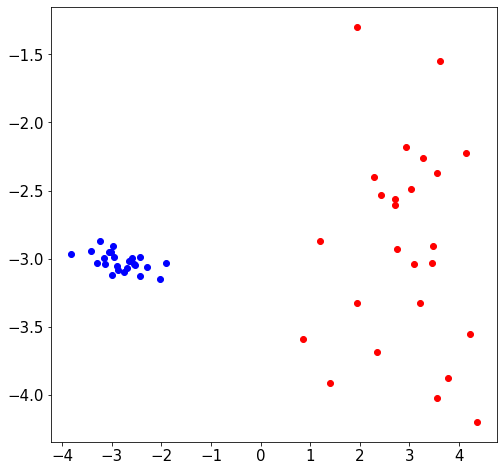

In [28]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams['font.size'] = 15

plt.scatter(X[:,0][y==1], X[:,1][y==1], color='red');
plt.scatter(X[:,0][y==-1], X[:,1][y==-1], color='blue');

## 6
Initialize w to be a zero vector, with shape equal to the number of features in the data.



In [14]:
w = np.zeros(X.shape[1])
w

array([0., 0.])

## 7 
Iterate over each data point $x$ in $X$ one by one (in the same sequence as present in $X$). For each data point, compute the value of $w^Tx$. If $w^Tx \ge 0$, predict positive class for $x$, else predict the negative class.



In [17]:
def compute_class(x, w):
  w1 = w.T@x
  if w1 >= 0:
    return 1
  return -1

## 8

(In the same code,) If prediction does not match the actual class label for any data point, update the weight vector as per the following update rule:
$$w_{new} = w_{old} + xy$$ where $x$ is the data point and $y$ is the actual label of $x$.


In [19]:
for i in range(X.shape[0]):
  if compute_class(X[i], w) != y[i]:
    w = w + X[i]*y[i]

w

array([ 6.08372134, -0.97979197])

## 9
(In the same code,) keep track of the total number of mistakes made by the algorithm.

In [21]:
num_of_mistakes = 0
w = np.zeros(X.shape[1])
for i in range(X.shape[0]):
  if compute_class(X[i], w) != y[i]:
    num_of_mistakes += 1
    w = w + X[i]*y[i]

print(w)
print(num_of_mistakes)

[ 6.08372134 -0.97979197]
2


## 10.
So far, we have run only one iteration over the entire data.

Run the same for 10 epochs (iterations), but stop if there are no weight updates in an epoch. 

In [31]:
number_of_epoch = 10
num_of_mistakes = 0
w = np.zeros(X.shape[1])
weight_updates_per_j = {}
for j in range(number_of_epoch):
  weight_updates_per_j[j] = 0
  for i in range(X.shape[0]):
    if compute_class(X[i], w) != y[i]:
      weight_updates_per_j[j] += 1
      num_of_mistakes += 1
      w = w + X[i]*y[i]
  if weight_updates_per_j[j] == 0:
    break

print(weight_updates_per_j)
print("weights: ", w)
print("num_of_mistakes: " , num_of_mistakes)

{0: 2, 1: 0}
weights:  [ 6.08372134 -0.97979197]
num_of_mistakes:  2


## 11

Plot the vector w and the decision boundary thus obtained.

Decision boundry is perpendicular to the weight vector.
The perpendicular vactor for any vector is to multiply with Transformation vector.

Transformation Matriz A:

$$
\begin{bmatrix}
0 & -1 \\
1 & 0
\end{bmatrix}
$$



[-0.97979197 -6.08372134]
[0.97979197 6.08372134]


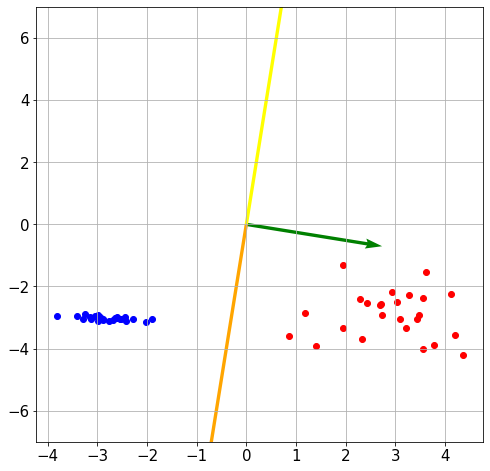

In [59]:
A = np.array([[0,-1], [1,0]])
B = np.array([[0,1], [-1,0]])
perpendicular_vector = w@A
print(perpendicular_vector)
perpendicular_vector_2 = w@B
print(perpendicular_vector_2)
plt.scatter(X[:,0][y==1], X[:,1][y==1], color='red');
plt.scatter(X[:,0][y==-1], X[:,1][y==-1], color='blue');
plt.quiver(0,0, w[0], w[1], scale=20, color='g'); # the actual weight vector
plt.quiver(0,0, perpendicular_vector[0], perpendicular_vector[1], scale=7, color='orange', headaxislength=0, headlength=0); # the actual weight vector
plt.quiver(0,0, perpendicular_vector_2[0], perpendicular_vector_2[1], scale=7, color='yellow', headaxislength=0, headlength=0); # the actual weight vector
plt.ylim(-7, 7)
plt.grid()

## 12
What is the value of loss using the weight vector obtained earlier?  


In [61]:
loss = 0
for i in range(X.shape[0]):
  y_hat = compute_class(X[i], w)
  if y_hat != y[i]:
    loss += 1

print(loss)



0


This is zero one loss and it is seperated linearly.

# Non-linearly separable case

## 13
Now use a data set that is not linearly separable. Replace occurrences of 0 with -1 and visualize.



In [62]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=50, n_features=2, n_informative = 2, n_redundant = 0, n_clusters_per_class = 1, flip_y = 0.1, class_sep = 2, random_state=20)

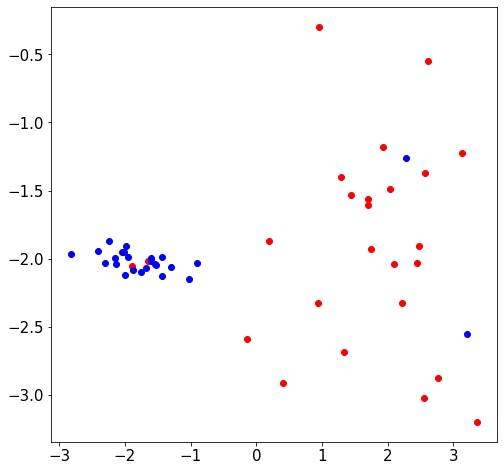

In [65]:
y[y==0] = -1
plt.scatter(X[:,0][y==1], X[:,1][y==1], color='red');
plt.scatter(X[:,0][y==-1], X[:,1][y==-1], color='blue');

## 14

Apply the Perceptron code again. 

What is the number of weight updates performed in each epoch?


In [66]:
number_of_epoch = 10
num_of_mistakes = 0
w = np.zeros(X.shape[1])
weight_updates_per_j = {}
for j in range(number_of_epoch):
  weight_updates_per_j[j] = 0
  for i in range(X.shape[0]):
    if compute_class(X[i], w) != y[i]:
      weight_updates_per_j[j] += 1
      num_of_mistakes += 1
      w = w + X[i]*y[i]
  if weight_updates_per_j[j] == 0:
    break

print(weight_updates_per_j)
print("weights: ", w)
print("num_of_mistakes: " , num_of_mistakes)

{0: 13, 1: 11, 2: 12, 3: 11, 4: 11, 5: 10, 6: 11, 7: 11, 8: 11, 9: 11}
weights:  [ 2.8171108  -0.63769675]
num_of_mistakes:  112


[-0.63769675 -2.8171108 ]
[0.63769675 2.8171108 ]


(-7.0, 7.0)

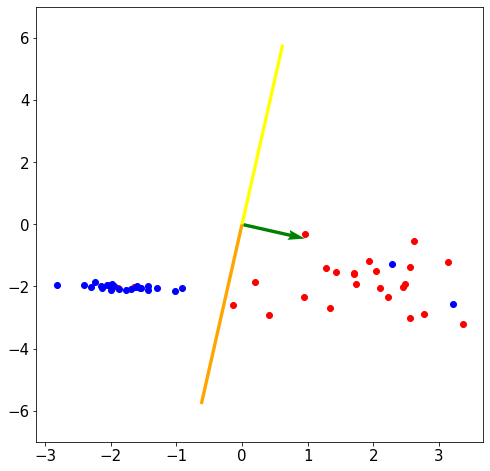

In [69]:
A = np.array([[0,-1], [1,0]])
B = np.array([[0,1], [-1,0]])
perpendicular_vector = w@A
print(perpendicular_vector)
perpendicular_vector_2 = w@B
print(perpendicular_vector_2)
plt.scatter(X[:,0][y==1], X[:,1][y==1], color='red');
plt.scatter(X[:,0][y==-1], X[:,1][y==-1], color='blue');
plt.quiver(0,0, w[0], w[1], scale=20, color='g'); # the actual weight vector
plt.quiver(0,0, perpendicular_vector[0], perpendicular_vector[1], scale=7, color='orange', headaxislength=0, headlength=0); # the actual weight vector
plt.quiver(0,0, perpendicular_vector_2[0], perpendicular_vector_2[1], scale=7, color='yellow', headaxislength=0, headlength=0); # the actual weight vector
plt.ylim(-7, 7)
# plt.grid()

In [68]:
loss = 0
for i in range(X.shape[0]):
  y_hat = compute_class(X[i], w)
  if y_hat != y[i]:
    loss += 1

print(loss)

4
